In [1]:
from utils import read_infections_and_deaths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from june.records import RecordReader

No --data argument given - defaulting to:
/cosma6/data/dp004/dc-cues1/JUNE-private/data
No --configs argument given - defaulting to:
/cosma6/data/dp004/dc-cues1/JUNE-private/june/configs
--------------------------------------------------------------------------
By default, for Open MPI 4.0 and later, infiniband ports on a device
are not used by default.  The intent is to use UCX for these devices.
You can override this policy by setting the btl_openib_allow_ib MCA parameter
to true.

  Local host:              login7b
  Local adapter:           mlx5_0
  Local port:              1

--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   login7b
  Local device: mlx5_0
--------------------------------------------------------------------------


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use(['science'])
plt.style.reload_library()

In [3]:
read = RecordReader(
    results_path=  #Dataset not publicly available, please contact the authors to be granted access
)
people_df = read.table_to_df('population')

In [4]:
%%time

infections_df, deaths_df = read_infections_and_deaths(run=7)


CPU times: user 29.2 s, sys: 5.68 s, total: 34.9 s
Wall time: 36.5 s


In [5]:
age_bins = [0,12,16,18,40,60,80,100]


In [6]:
mean_age = infections_df.groupby(['timestamp'])['age'].mean().rolling(window='5D').median()

In [7]:
n_infections = infections_df.groupby(['timestamp']).size().rolling(window='5D').mean()

In [8]:
df_age = pd.concat([n_infections, mean_age], axis=1)

In [9]:
df_age.index = pd.to_datetime(df_age.index)

Text(0, 0.5, '\\# Infections')

2021-09-22 13:02:22,683 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,863 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,867 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,868 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,870 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,870 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:24,872 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:25,217 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,219 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,219 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,221 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,223 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,223 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,225 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:25,364 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,365 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,366 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,367 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,368 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,369 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:25,371 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

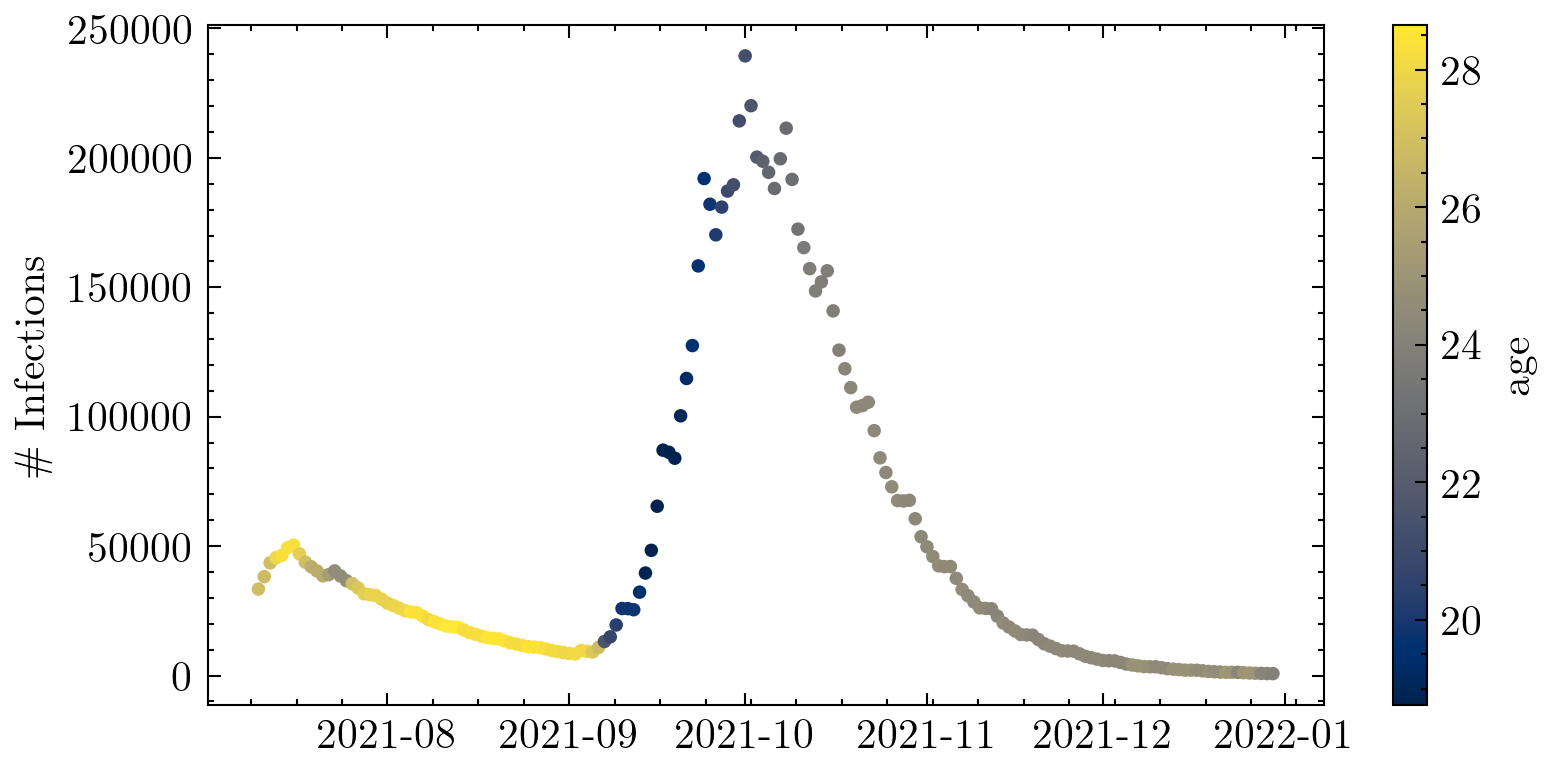

In [10]:
fig, ax = plt.subplots(figsize=(6,3))

df_age.reset_index().plot.scatter(
    'timestamp', 0, c='age',cmap='cividis',ax=ax,
    s=5
)
ax.set_xlabel('')
ax.set_ylabel('\# Infections')

In [11]:
# Percent of daily infections by age group

In [12]:
n_infected_by_age = infections_df.groupby(['timestamp',pd.cut(infections_df['age'],
            bins=age_bins,right=False)]).size()

In [13]:
percent_infections_in_age_group = n_infected_by_age/infections_df.groupby(['timestamp']).size()

Text(0.5, 0, '')

2021-09-22 13:02:26,965 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,967 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,968 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,969 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,971 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,972 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:26,976 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:27,221 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,221 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,223 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,224 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,229 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,230 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:27,272 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:28,425 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,428 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,456 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,458 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,459 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,461 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:28,463 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:29,340 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,344 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,345 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,348 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,349 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,351 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,354 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

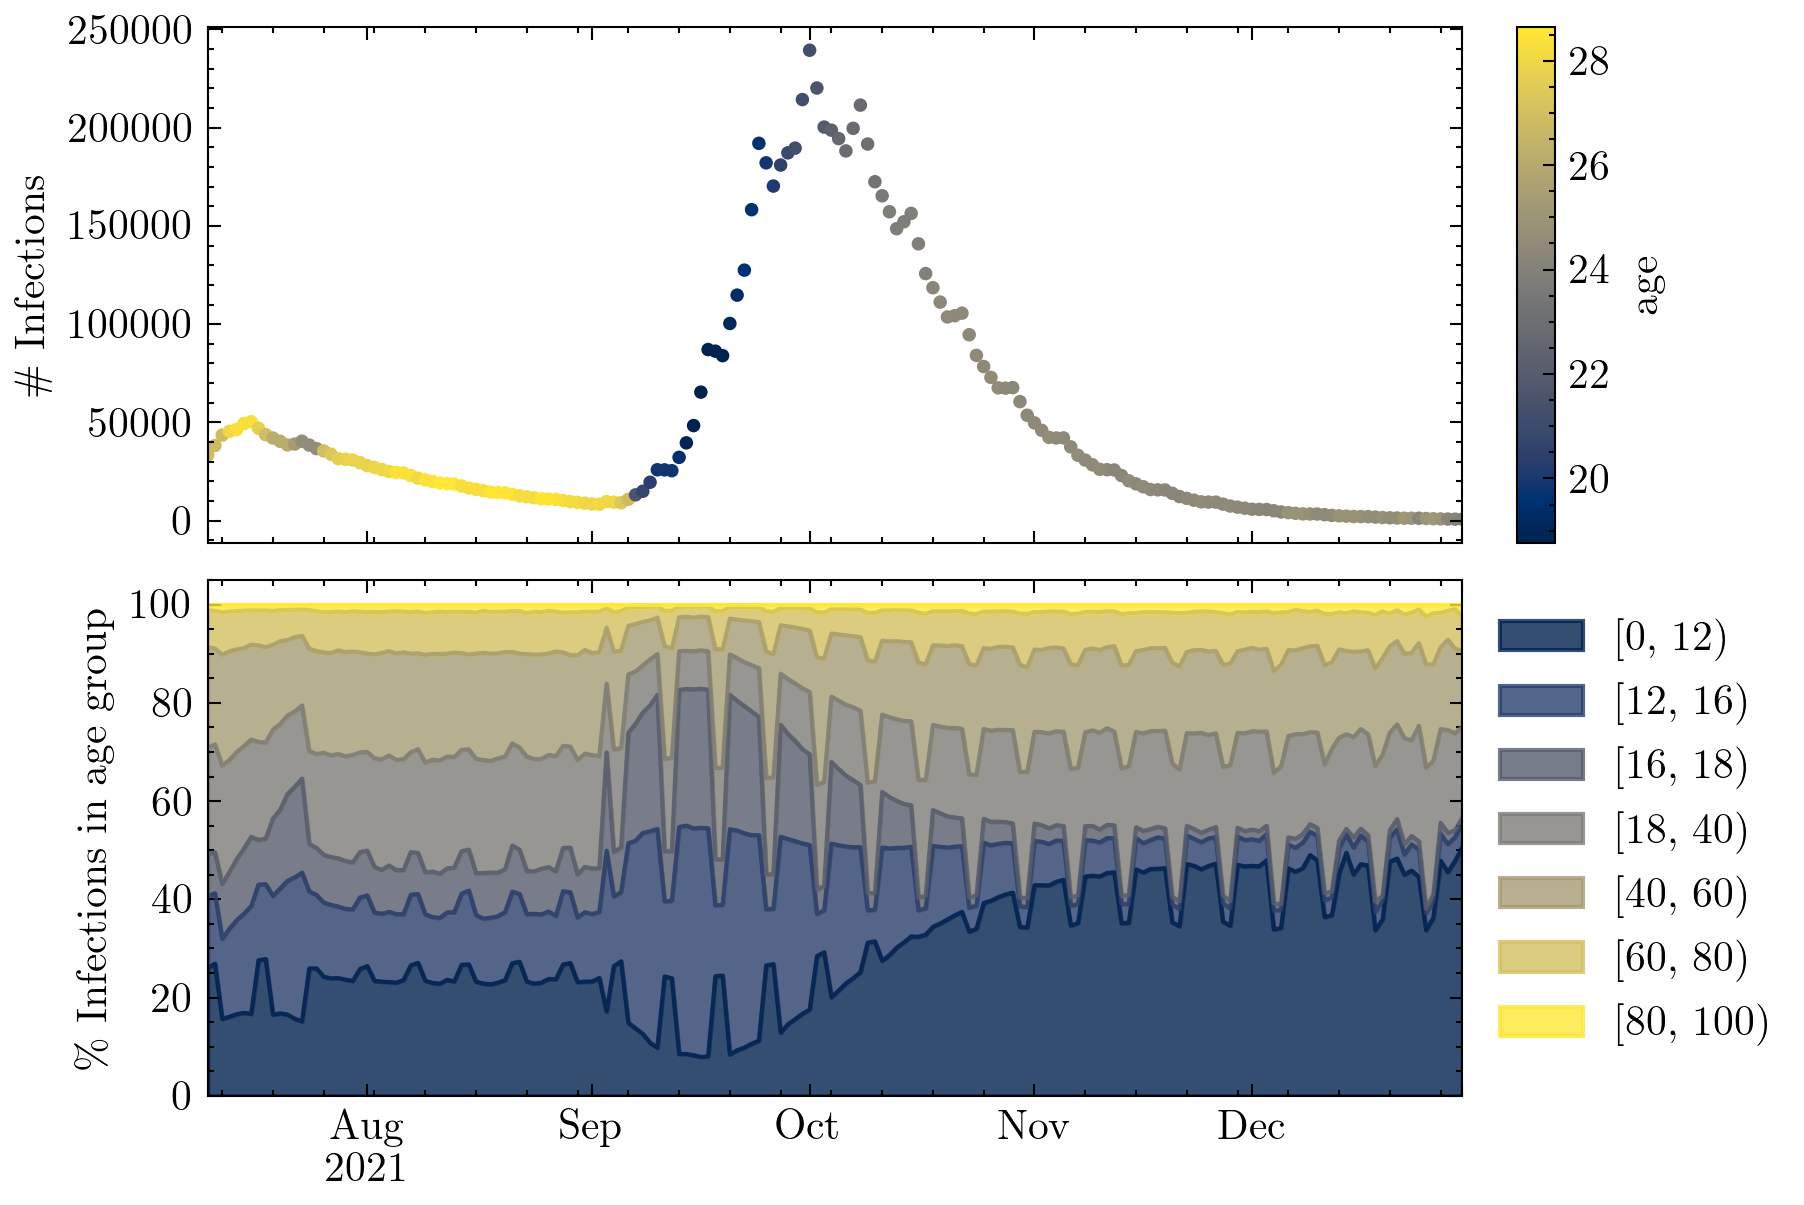

In [14]:
fig, ax = plt.subplots(nrows=2,figsize=(6,4),sharex=True,
                       constrained_layout=True,
                       gridspec_kw = {'wspace': 0.,'hspace':0}
                      )

df_age.reset_index().plot.scatter(
    'timestamp', 0, c='age',cmap='cividis',ax=ax[0],
    s=5
)
ax[0].set_xlabel('')
ax[0].set_ylabel('\# Infections')

(100.*percent_infections_in_age_group).unstack().plot.area(stacked=True, cmap='cividis',alpha=0.8,ax=ax[1])
ax[1].set_ylabel('\% Infections in age group')

ax[1].legend(bbox_to_anchor=(1,1))
ax[1].set_xlabel('')
#fig.subplots_adjust(hspace=0)

2021-09-22 13:02:29,986 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,987 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,989 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,990 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,992 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,993 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:29,997 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:30,275 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:30,281 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:30,282 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:30,920 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:30,922 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:31,571 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:31,574 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:32,645 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,061 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,065 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,067 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,069 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,072 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,093 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:35,973 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,974 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,976 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,978 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,980 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,981 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:35,982 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:36,856 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,471 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,472 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,474 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,474 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,477 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:37,478 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:39,289 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,290 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,291 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,292 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,294 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,295 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:39,296 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:02:40,834 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,834 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,857 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,858 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,860 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,861 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:02:40,863 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

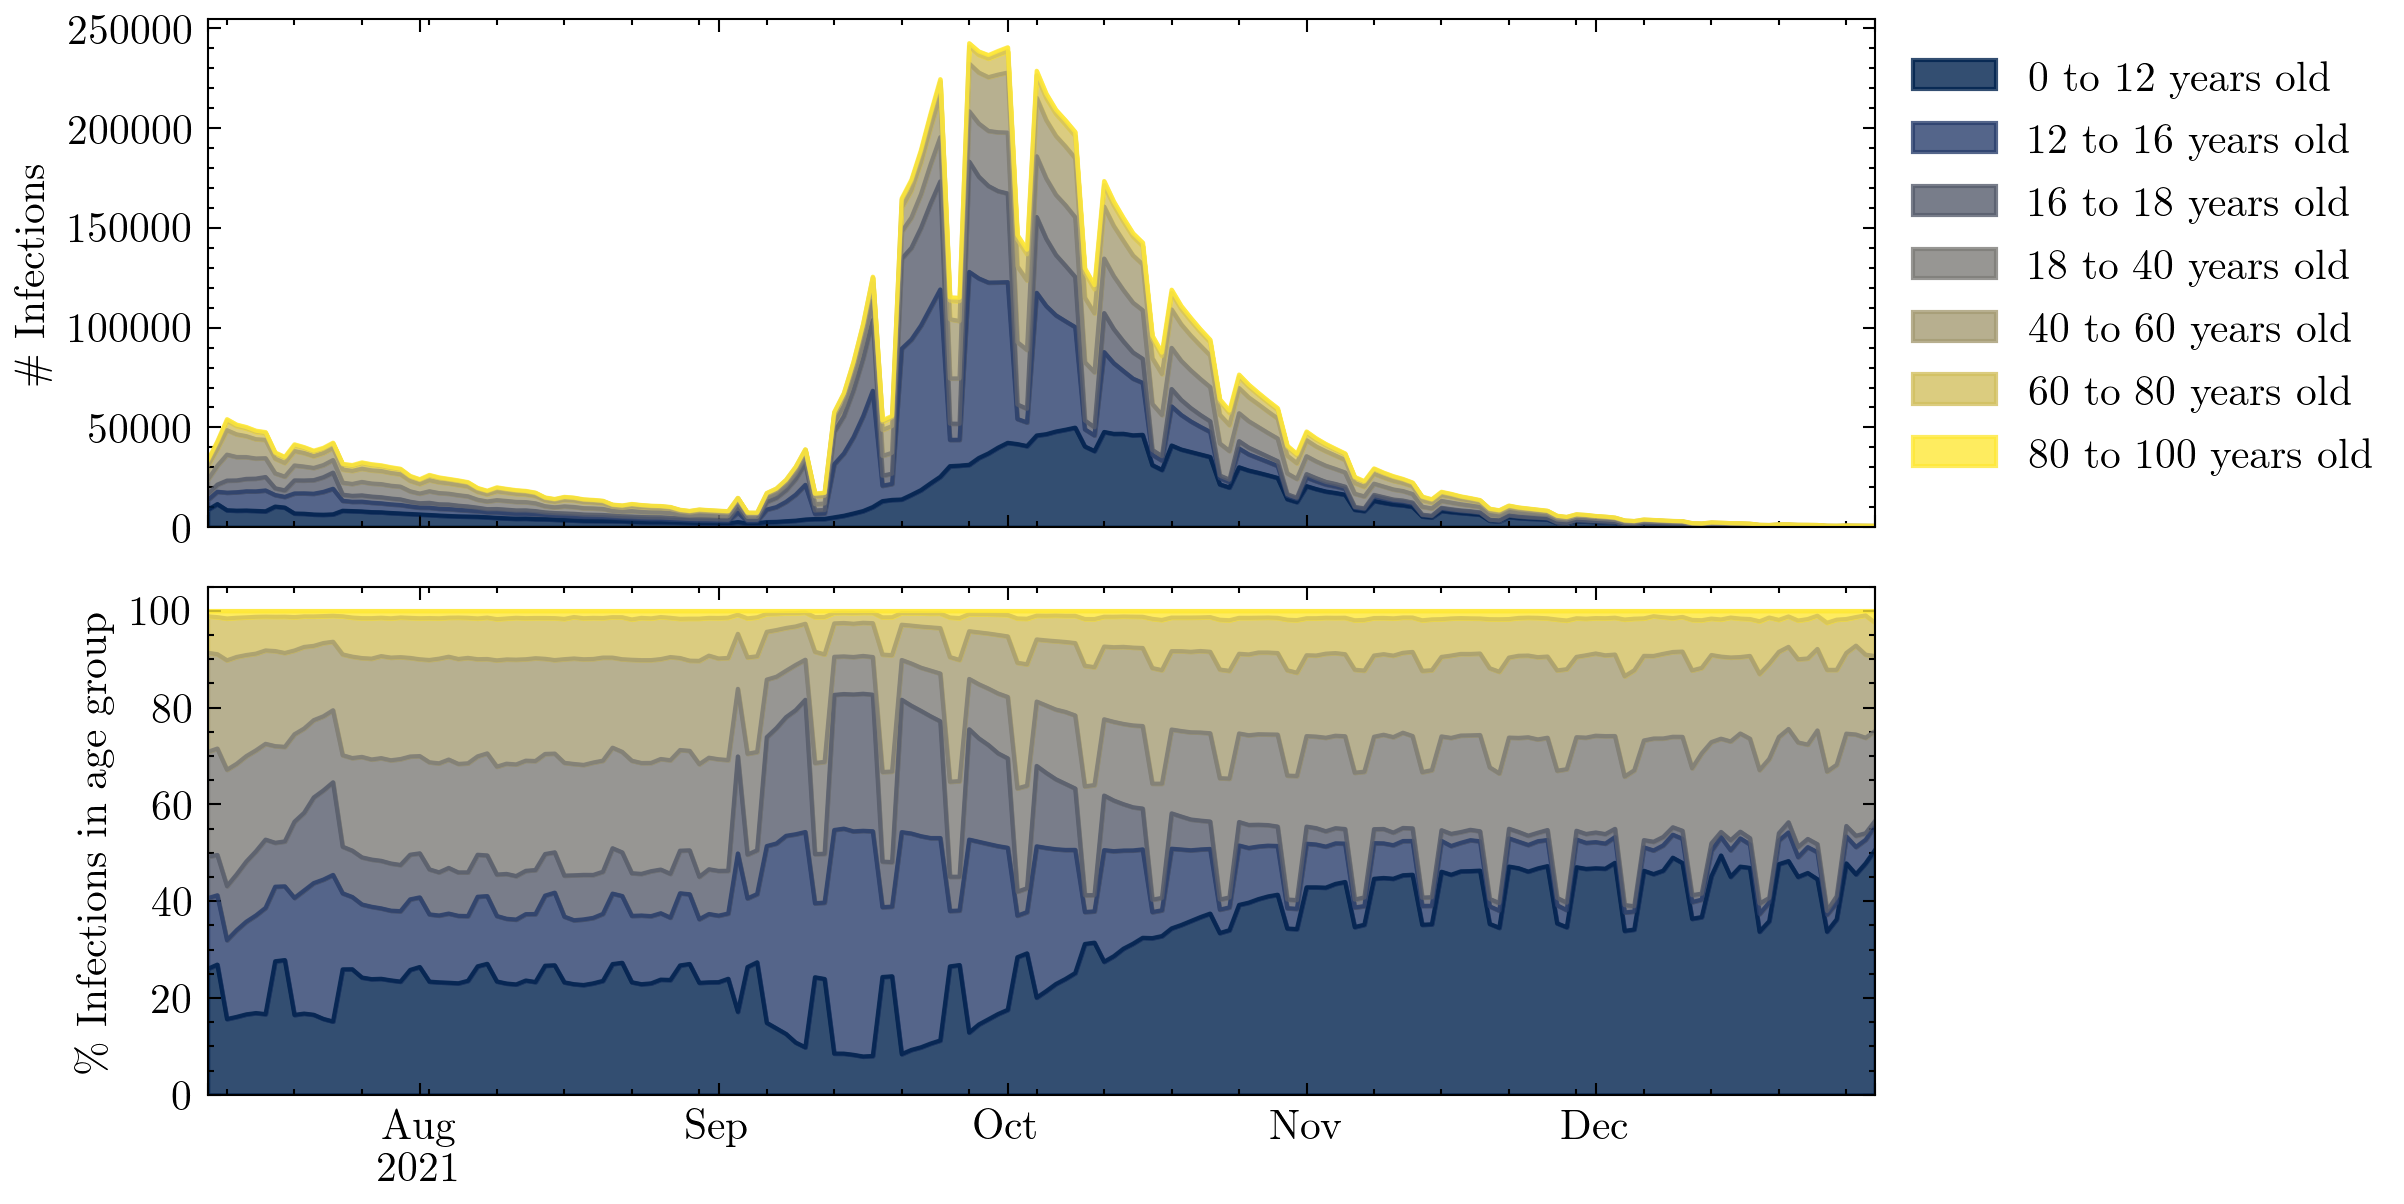

In [15]:
fig, ax = plt.subplots(nrows=2,figsize=(8,4),sharex=True,
                       constrained_layout=True,
                       gridspec_kw = {'wspace': 0.,'hspace':0}
                      )

(n_infected_by_age).unstack().plot.area(stacked=True, cmap='cividis',alpha=0.8,ax=ax[0],legend=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('\# Infections')

(100.*percent_infections_in_age_group).unstack().plot.area(stacked=True, cmap='cividis',alpha=0.8,ax=ax[1],
                                                          legend=False)
ax[1].set_ylabel('\% Infections in age group')

L = ax[0].legend(bbox_to_anchor=(1,1))
L.get_texts()[0].set_text('0 to 12 years old')
L.get_texts()[1].set_text('12 to 16 years old')
L.get_texts()[2].set_text('16 to 18 years old')
L.get_texts()[3].set_text('18 to 40 years old')
L.get_texts()[4].set_text('40 to 60 years old')
L.get_texts()[5].set_text('60 to 80 years old')
L.get_texts()[6].set_text('80 to 100 years old')

ax[1].set_xlabel('')
#fig.subplots_adjust(hspace=0)
plt.savefig('../figures/age_hists.pdf')